In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from ast import literal_eval

# Load in Grouped Data File

In [2]:
generic = lambda x: literal_eval(x)

conv = {'url_id_path': generic,
        'seconds_spent_path': generic}

df = pd.read_csv('DATA/Data/testGrouped.csv', converters=conv)

# Load in Test Data File
### Used to test the validity and correctness of the below methods

In [16]:
# load test data
testDF = pd.read_csv('DATA/Data/testVis.csv', converters=conv)

# Below method is to get the frequency of each ID

In [12]:
def get_frequencies_of_url_ids():
    # Find the most visited pages
    # Create an array to count the number of times a web page ID is visited.
    no_of_visits = np.zeros(5038, dtype=int) 
    # Loop through every row and every path list and increase the value of each ID when it occurs.
    for index, row in df.iterrows():
        if index % 100000 == 0:
            print(f"{index} rows complete!")
        for url_id in row.url_id_path:
            no_of_visits[url_id] += 1
    print("DONE!")
    return no_of_visits

In [ ]:
url_id_frequency = get_frequencies_of_url_ids()

# Method below returns a dictionary where the key is a url ID and the value is the count of how many times that ID was a dropout page. You can decide to include logouts or look at the page before the logout

In [23]:
# Method which returns a dictionary of dropout frequencies
# You can decide whether to include logouts, or look at the page previous.
def get_frequency_of_dropout(include_logout=True):
    # Dictionary where key is url_id, value is the # of times it is a 'dropout' page
    dropouts = {}
    for index, row in df.iterrows():
        id_path = row.url_id_path
        if len(id_path) > 1: # Just checking that the visit is 2 or more pages long
            # Check whether last page is a logout, then whether we want to include logouts
            if id_path[-1] == 1556 and not include_logout:
                # If we do not want to include logouts, we look at the previous page
                if id_path[-2] in dropouts:
                    dropouts[id_path[-2]] += 1
                else:
                    dropouts[id_path[-2]] = 1
            else:
                if id_path[-1] in dropouts:
                    dropouts[id_path[-1]] += 1
                else:
                    dropouts[id_path[-1]] = 1
        if index % 100000 == 0:
            print(f"{index} rows complete!")
    print("DONE!!")
    return dropouts                

In [ ]:
# Get 2 dictionaries, one with logouts and one without.
dropouts_with_logouts = get_frequency_of_dropout()
dropouts_no_logouts = get_frequency_of_dropout(include_logout=False)

# Method below takes the dropout dictionary as input and divided the dropout frequency by the visit frequency

In [45]:
# Normalise by dividing dropout frequency with visit frequency.
# Essentially, dropout_frequency/visit_frequency.
def scale_dropouts(dropouts_to_be_scaled, visits_url_id):
    scaled_dropout_frequency = {}

    for key, value in dropouts_to_be_scaled.items():
        if key < 1560 and not visits_url_id[key] < 10:
            scaled_dropout_frequency[key] = value/visits_url_id[key] # dropout frequency/visit frequency of that ID
    return scaled_dropout_frequency

In [46]:
visit_urls = [10, 30, 112, 3, 7, 22]
dropout_dict = {
                0: 1,
                1: 7,
                2: 21,
                3: 0,
                4: 2,
                5: 3
                }

scaled_dropouts = scale_dropouts(dropout_dict, visit_urls)
# EXPECTED: {0: 0.1, 1: 0.233, 2: 0.1875, 5: 0.136}
scaled_dropouts

{0: 0.1, 1: 0.23333333333333334, 2: 0.1875, 5: 0.13636363636363635}

In [47]:
# Get scaled dictionaries for logouts and no logouts
scaled_dropouts_with_logouts = scale_dropouts(dropouts_with_logouts, url_id_frequency)
scaled_dropouts_no_logouts = scale_dropouts(dropouts_no_logouts, url_id_frequency)

# Now to visualise both dictionaries

In [48]:
# First let's visualise the scaled dropouts with logouts
# Get 10 highest values
sort_scaled_logouts = dict(sorted(scaled_dropouts_with_logouts.items(), key=lambda item: item[1], reverse=True))
sort_scaled_logouts_10 = dict(zip(list(sort_scaled_logouts.keys())[:10], list(sort_scaled_logouts.values())[:10]))
sort_scaled_logouts_10

{1556: 0.6402318929223794,
 60: 0.5979822161422709,
 277: 0.5374129500666766,
 471: 0.49377593360995853,
 54: 0.4743245913671908,
 279: 0.4614848379226211,
 1462: 0.4477791116446579,
 59: 0.44514959202175886,
 297: 0.4303969548667754,
 1084: 0.42298850574712643}

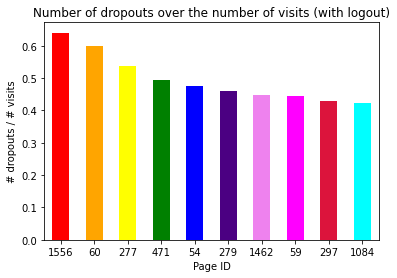

In [56]:
df_scaled_logouts = pd.DataFrame(sort_scaled_logouts_10.items(), columns=['Page_ID', 'Scaled_Dropout_Rate'])
ax = df_scaled_logouts.plot.bar(x='Page_ID', y='Scaled_Dropout_Rate', color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'magenta', 'crimson', 'cyan'], rot=0, legend=False)
ax.set_xlabel("Page ID")
ax.set_ylabel("# dropouts / # visits")
ax.set_title("Number of dropouts over the number of visits (with logout)")
plt.ticklabel_format(style='plain', axis='y')

In [55]:
# Next let's visualise the scaled dropouts without logouts (logouts replaced with the previos page)
# Get 10 highest values
sort_scaled_no_logouts = dict(sorted(scaled_dropouts_no_logouts.items(), key=lambda item: item[1], reverse=True))
sort_scaled_no_logouts_10 = dict(zip(list(sort_scaled_no_logouts.keys())[:10], list(sort_scaled_no_logouts.values())[:10]))
sort_scaled_no_logouts_10

{60: 0.5988714090287278,
 277: 0.5387464809601422,
 133: 0.5081967213114754,
 471: 0.49377593360995853,
 54: 0.47449397284250344,
 37: 0.46852836879432624,
 279: 0.46427326594632273,
 1462: 0.45666266506602643,
 59: 0.44673617407071625,
 112: 0.4421052631578947}

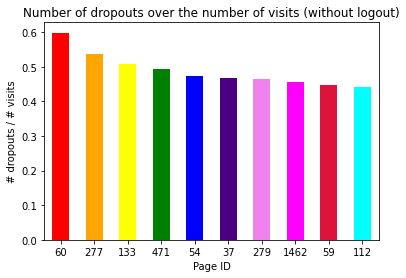

In [58]:
df_scaled_no_logouts = pd.DataFrame(sort_scaled_no_logouts_10.items(), columns=['Page_ID', 'Scaled_Dropout_Rate'])
ax = df_scaled_no_logouts.plot.bar(x='Page_ID', y='Scaled_Dropout_Rate', color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'magenta', 'crimson', 'cyan'], rot=0, legend=False)
ax.set_xlabel("Page ID")
ax.set_ylabel("# dropouts / # visits")
ax.set_title("Number of dropouts over the number of visits (without logout)")
plt.ticklabel_format(style='plain', axis='y')